Populating the interactive namespace from numpy and matplotlib
(1000, 2)
   study_hours     grades
0    32.143368  75.636962
1    27.466725  76.932627
2    21.247638  68.575996
3    33.726661  81.221442
4    36.501309  84.787467


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['fmax', '_get_promotion_state', '_set_promotion_state', 'issubsctype', 'unique', 'right_shift', 'row_stack', 'gradient', 'real_if_close', 'nancumprod', 'compare_chararrays', 'fmod', 'diag_indices', 'fabs', 'flip', 'put', 'amax', 'asfortranarray', 'tri', 'nanstd', 'inner', 'fromfunction', 'isclose', 'nanquantile', 'cumsum', 'setdiff1d', 'isin', 'einsum_path', 'outer', 'sinh', 'expand_dims', 'sinc', 'setbufsize', 'asarray', 'arctan2', 'mat', 'compress', 'cos', 'spacing', 'blackman', 'argpartition', 'deg2rad', 'divmod', 'matmul', 'getbufsize', 'savetxt', 'min_scalar_type', 'average', 'nanargmin', 'expm1', 'polymul', 'angle', 'diagflat', 'busday_offset', 'sum', 'polydiv', 'degrees', 'conj', 'frombuffer', 'kaiser', 'polyadd', '_add_newdoc_ufunc', '__version__', 'atleast_1d', 'vsplit', 'ix_', 'lexsort', 'array_equal', 'sort', 'promote_types', 'fft', 'asarray_chkfinite', 

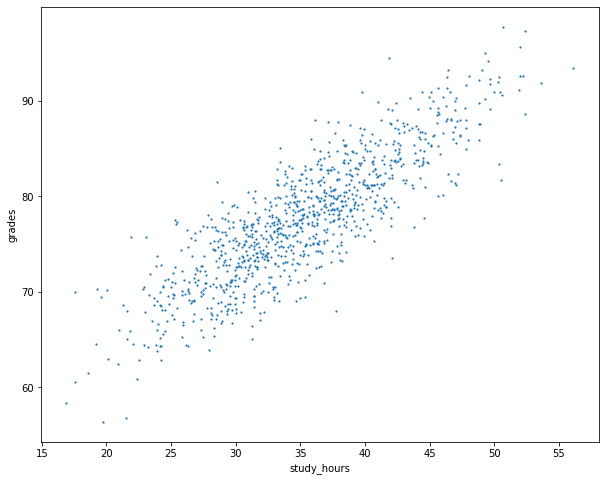

In [3]:
# Homework Credit: https://github.com/VSerpak/DSE210x-Statistics-and-Probability-in-Data-Science-using-Python/tree/master/Week%209%20Regression%20and%20PCA
%pylab inline
# %pylab magic function is entered at the IPython prompt, it triggers the import of various modules within Matplotlib
from scipy import *
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

def f(x, reg):
    return reg[0]+ x*reg[1]

# data is pandas dataframe
data = pd.read_csv('data/hw_regression_data.csv')
# print how data is organized
# (1000,2) means 1000 rows, 2 columns, not including title
print(data.shape)
# preview data first 5 rows
print(data.head())

# plot scatter plot, s defines dot size
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
# ax= data.plot(kind='scatter',s=140,x="study_hours",y="grades",figsize=[10,8]);

In [8]:
def f(x, reg):
    return reg[0]+ x*reg[1]

In [4]:
# modify this cell

def get_averages(data):
    # input: the HW's dataset
    # output: a pandas dataframe yielding the mean grade for each rounded number of study hours
    
    
    # Your code
    # round function can round numbers to the nearest whole number
    # use .round() function
    data['study_hours'] = data['study_hours'].round()
    
    
    # generate average grades for the same round-study-hours
    # hint use groupby and mean function 
    return data.groupby(['study_hours']).mean()
    


/tmp/ipykernel_835/713387835.py:10: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  try: assert sum(abs( grade_means.tail()["grades"].values - \


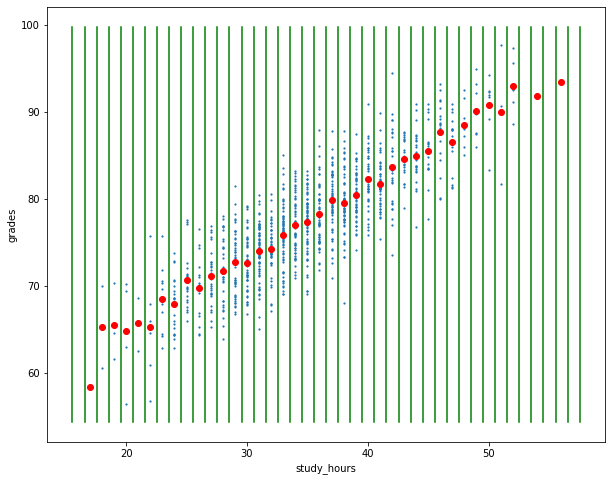

In [5]:
# check student function
grade_means = get_averages(data)

assert grade_means.shape == (38, 1)
assert str(type(grade_means)) == "<class 'pandas.core.frame.DataFrame'>"

try: assert grade_means.columns[0] == "grades"
except: raise ValueError('the column in "grade_means" must be named grades')

try: assert sum(abs( grade_means.tail()["grades"].values - \
               np.array([ 90.77739,90.02272,92.97258,91.87963,93.48365])    )) < 10**-4
except: raise ValueError('some values are incorrect in grade_means')
 

# plot Graph
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
grade_means.plot(y='grades',style='ro', ax=ax,legend=False)
_xlim = xlim()
_ylim =ylim()
for _x in arange(_xlim[0]+0.5,_xlim[1],1):
    plot([_x,_x],[_ylim[0],_ylim[1]],'g')



#
# AUTOGRADER TEST - DO NOT REMOVE
#


In [17]:
def do_regression(data):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) from linear regression
    
    # Your code
    # groupby grade, .value
    # vstack merges a column containing only ones with x
    avg_data = get_averages(data)
    print(avg_data)
    x = avg_data.index.values
    # groupby grade, .value
    y = avg_data.values
    # vstack merges a column containing only ones with x
    A = np.vstack([x, np.ones(len(x))]).T
    print(A)
    print(x)
    print(y)
    # least-squares solution to a linear matrix equation.
    # rcond: Cut-off ratio for small singular values of a. 
    # Singular values are set to zero if they are smaller than rcond times the largest singular value of a.
    w1, w0 = np.linalg.lstsq(A, y, rcond=None)[0]
    print(w1,w0)
    return np.array([w0[0],w1[0]])

                grades
study_hours           
17.0         58.338329
18.0         65.288831
19.0         65.433256
20.0         64.746281
21.0         65.671555
22.0         65.258901
23.0         68.441699
24.0         67.901341
25.0         70.610577
26.0         69.794460
27.0         71.090184
28.0         71.726101
29.0         72.676676
30.0         72.636015
31.0         73.982953
32.0         74.262442
33.0         75.867342
34.0         77.007990
35.0         77.287141
36.0         78.240669
37.0         79.823869
38.0         79.498097
39.0         80.494188
40.0         82.256052
41.0         81.765407
42.0         83.617614
43.0         84.622452
44.0         84.961637
45.0         85.564646
46.0         87.692766
47.0         86.503366
48.0         88.523286
49.0         90.166542
50.0         90.777400
51.0         90.022721
52.0         92.972589
54.0         91.879630
56.0         93.483651
[[17.  1.]
 [18.  1.]
 [19.  1.]
 [20.  1.]
 [21.  1.]
 [22.  1.]
 [23.  1.]
 [2

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


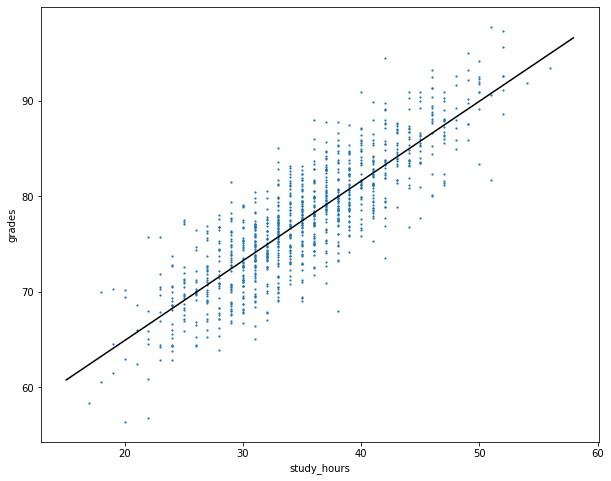

In [18]:
# check student function
w1_hw = do_regression(data)
assert str(type(w1_hw)) ==  "<class 'numpy.ndarray'>"
assert w1_hw.shape == (2,)
assert abs(w1_hw[0] - 48.0694704904) < 1


# plot Means
print(w1_hw)
ax= data.plot(kind='scatter',s=1.4,x="study_hours",y="grades",figsize=[10,8]);
# return current limit of x axis
x0,x1=xlim()
print(x0, x1)
# f is the helper function we have defined
# with two different points, the plot function from pandas can draw a line
ax.plot([x0,x1],[f(x0,w1_hw),f(x1,w1_hw)],'k');

#
# AUTOGRADER TEST - DO NOT REMOVE
#
